In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = 5
x_bin = [int(x) for x in list(bin(x)[2:])]
n = len(x_bin)
print(f"Binary representation of {x}: {x_bin}, we need {n} bits")

Binary representation of 5: [1, 0, 1], we need 3 bits


In [8]:
dev = qml.device('default.qubit', wires=n)

@qml.qnode(dev)
def circuit(feature_vector):
    qml.BasisEmbedding(features=feature_vector, wires=range(n))
    return qml.state()

print(qml.draw(circuit, expansion_strategy="device")(x_bin))

0: ──X─┤ ╭State
1: ────┤ ├State
2: ──X─┤ ╰State


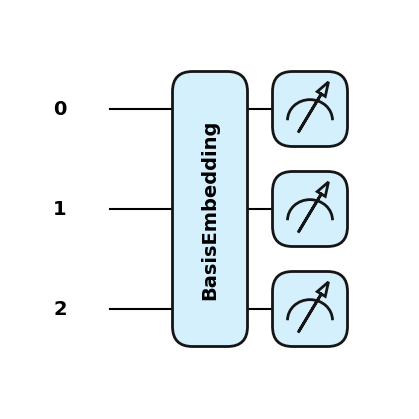

In [14]:
qml.draw_mpl(circuit, show_all_wires=True, style="pennylane")(x_bin)
plt.show()

In [21]:
n_wires = 4
dev = qml.device("default.qubit", wires=n_wires, shots=1)

def add_k_fourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

@qml.qnode(dev)
def sum(m, k):
    qml.BasisEmbedding(m, wires=range(n_wires))  # m encoding
    qml.QFT(wires=range(n_wires))  # step 1
    add_k_fourier(k, range(n_wires))  # step 2
    qml.adjoint(qml.QFT)(wires=range(n_wires))  # step 3 

    return qml.sample()

# mind the overflow
print(f"The ket representation of the sum of 3 and 4 is {sum(3,1)}")

The ket representation of the sum of 3 and 4 is [0 1 0 0]
